In [1]:
import omicverse as ov
ov.utils.ov_plot_set()
from matplotlib import rcParams

# 设置全局字体为Arial
rcParams['font.family'] = 'Arial'

2023-08-28 16:18:43.947883: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-28 16:18:44.418033: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-08-28 16:18:44.418096: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-08-28 16:18:44.418102: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

In [2]:
!gpustat

/mnt/data/env/pyomic/lib/python3.8/site-packages/blessed/terminal.py:183: UserWarning: Failed to setupterm(kind='xterm-color'): setupterm: could not find terminfo database
  warnings.warn(msg)
clever                         Mon Aug 28 16:18:45 2023  525.105.17
[0] NVIDIA GeForce RTX 2080 Ti | 41°C,   0 % |  3387 / 11264 MB | zehuazeng(1184M) zehuazeng(576M) zehuazeng(1198M) gdm(18M) gdm(90M) ustbjump(50M) ustbjump(9M)


In [3]:
import scanpy as sc
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [85]:
adata = sc.read('data/bone_marrow.h5ad')
adata

AnnData object with n_obs × n_vars = 5780 × 27876
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential'
    var: 'palantir'
    uns: 'clusters_colors', 'palantir_branch_probs_cell_types'
    obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs'
    layers: 'spliced', 'unspliced'

In [87]:
adata=ov.pp.qc(adata,
              tresh={'mito_perc': 0.2, 'nUMIs': 500, 'detected_genes': 250})
adata

Calculate QC metrics
End calculation of QC metrics.
Original cell number: 5292
Begin of post doublets removal and QC plot
Running Scrublet
filtered out 13082 genes that are detected in less than 3 cells
normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
normalizing counts per cell
    finished (0:00:00)
normalizing counts per cell
    finished (0:00:00)
Embedding transcriptomes using PCA...
Automatically set threshold at doublet score = 0.53
Detected doublet rate = 0.2%
Estimated detectable doublet fraction = 12.8%
Overall doublet rate:
	Expected   = 5.0%
	Estimated  = 1.9%
    Scrublet finished (0:00:20)
Cells retained after scrublet: 5279, 13 removed.
End of post doublets removal and QC plots.
Filters application (seurat or mads)
Lower tresh

AnnData object with n_obs × n_vars = 5274 × 14790
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'palantir', 'mt', 'n_cells'
    uns: 'clusters_colors', 'palantir_branch_probs_cell_types', 'scrublet'
    obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs'
    layers: 'spliced', 'unspliced'

In [88]:
adata=ov.pp.preprocess(adata,mode='shiftlog|pearson',n_HVGs=3000,)
adata

Begin robust gene identification
After filtration, 14790/14790 genes are kept. Among 14790 genes, 14790 genes are robust.
End of robust gene identification.
Begin size normalization: shiftlog and HVGs selection pearson
normalizing counts per cell The following highly-expressed genes are not considered during normalization factor computation:
[]
    finished (0:00:00)
extracting highly variable genes
--> added
    'highly_variable', boolean vector (adata.var)
    'highly_variable_rank', float vector (adata.var)
    'highly_variable_nbatches', int vector (adata.var)
    'highly_variable_intersection', boolean vector (adata.var)
    'means', float vector (adata.var)
    'variances', float vector (adata.var)
    'residual_variances', float vector (adata.var)
End of size normalization: shiftlog and HVGs selection pearson


AnnData object with n_obs × n_vars = 5274 × 14790
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'clusters_colors', 'palantir_branch_probs_cell_types', 'scrublet', 'log1p', 'hvg'
    obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs'
    layers: 'spliced', 'unspliced', 'counts'

In [89]:
adata3=adata.copy()
import scanpy as sc
#sc.pp.highly_variable_genes(adata3, n_top_genes=3000, flavor="seurat_v3")
adata3=adata3[:,adata3.var['highly_variable_features']==True]
adata3

View of AnnData object with n_obs × n_vars = 5274 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'clusters_colors', 'palantir_branch_probs_cell_types', 'scrublet', 'log1p', 'hvg'
    obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs'
    layers: 'spliced', 'unspliced', 'counts'

In [90]:
ov.pp.scale(adata3)
ov.pp.pca(adata3,layer='scaled',n_pcs=50)

... as `zero_center=True`, sparse input is densified and may lead to large memory consumption


In [91]:
sc.pp.neighbors(adata3, n_neighbors=15, n_pcs=50,
               use_rep='scaled|original|X_pca')

computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [10]:
sc.tl.umap(adata3)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:11)


In [92]:
adata3.obsm["X_mde"] = ov.utils.mde(adata3.obsm["scaled|original|X_pca"])

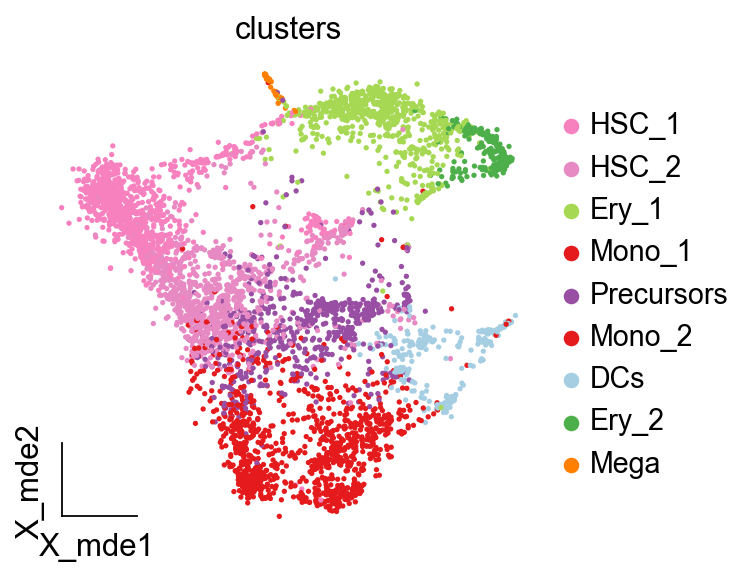

In [93]:
ov.utils.embedding(adata3,basis='X_mde', color=['clusters'], 
               cmap='PuRd',legend_loc='right margin',frameon='small')

In [ ]:
adata3=adata3[adata3.obs['clusters']!='CLP']

In [94]:
import Epiverse as ev
ev.utils.lsi(adata3, n_components=20, n_iter=15)

In [95]:
import scltnn
ltnn_obj=scltnn.scLTNN(adata3,basis='X_lsi',input_dim=20,)

In [68]:
ltnn_obj.ANNmodel_init(pseudotime='palantir_pseudotime',batch_size=20,)
ltnn_obj.ANNmodel_train(n_epochs=200)
ltnn_obj.ANNmodel_save('model/model_human.h5')

Pre-ANN model: 100%|██████████| 200/200 [01:05<00:00,  3.05it/s, val loss, val mae=0.00252, 0.00252]


In [96]:
ltnn_obj.ANNmodel_load('model/model_human.h5')
ltnn_obj.cal_paga(use_rep='scaled|original|X_pca',resolution=2)
ltnn_obj.cal_model_time()

......calculate paga
computing neighbors
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:01)
running Leiden clustering
    finished: found 23 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
......predict model_time


In [97]:
ltnn_obj.cal_exp_gene_value(rev=True,mode='ann')

gene in p_time_low 1.2210912 gene in p_time_high 4.7964873


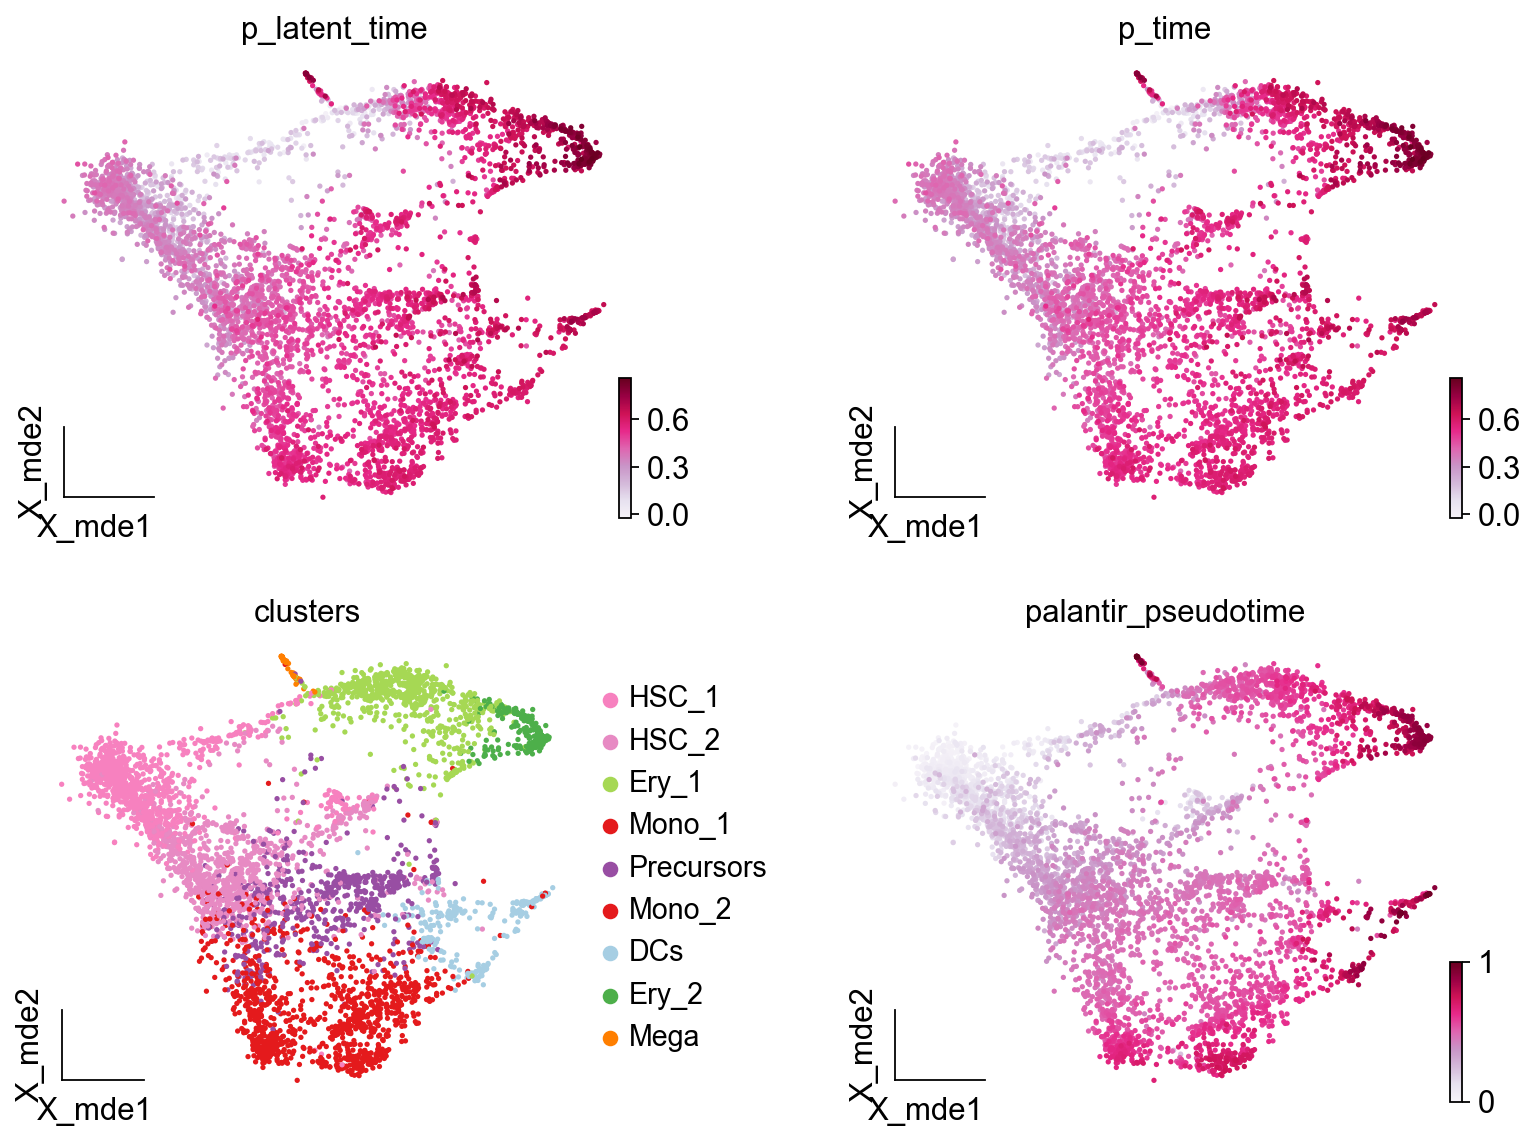

In [98]:
ov.utils.embedding(adata3,basis='X_mde', color=['p_latent_time','p_time','clusters','palantir_pseudotime'], 
               cmap='PuRd',legend_loc='right margin',frameon='small',ncols=2,wspace=0.4)

In [123]:
ltnn_obj.cal_dpt_pseudotime(leiden_range_start=0.2,leiden_range_mid=0.02,leiden_range_end=0.05)

......calculate dpt_pseudotime
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99346405 0.9862708  0.98198736 0.9754163  0.96979165
     0.96867543 0.96142876 0.95637923 0.94509476 0.9393426  0.9384379
     0.9292804  0.92783976 0.9243006 ]
    finished: added
    'X_diffmap', diffmap coordinates (adata.obsm)
    'diffmap_evals', eigenvalues of transition matrix (adata.uns) (0:00:00)
computing Diffusion Pseudotime using n_dcs=10
    finished: added
    'dpt_pseudotime', the pseudotime (adata.obs) (0:00:00)
......leiden_start: ['2', '0', '17']
......leiden_middle ['7', '6', '10']
......leiden_end ['4']


--> added 'pos', the PAGA positions (adata.uns['paga'])


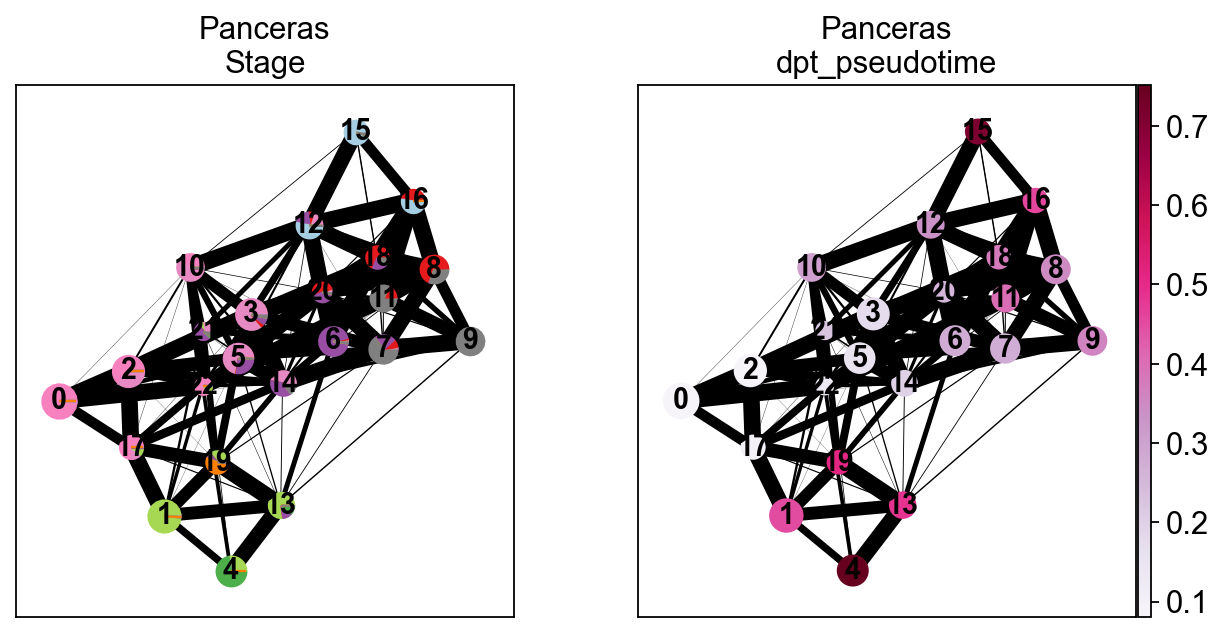

In [100]:
sc.pl.paga(ltnn_obj.adata, color=['clusters','dpt_pseudotime'],cmap='PuRd',
          title=['Panceras\nStage','Panceras\ndpt_pseudotime'],)
          #save='_fig3_pancreas.png')

In [101]:
ltnn_obj.ANN(batch_size=30,n_epochs=200,verbose=0)

......ANN


ANN model: 100%|██████████| 200/200 [00:05<00:00, 34.20it/s, val loss, val mae=0.00090, 0.00090]


In [102]:
ltnn_obj.cal_distrubute()
ltnn_obj.cal_scLTNN_time()

[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 12.9819] [loc=0.308 scale=0.201]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 20.4136] [loc=0.000 scale=0.308]
[distfit] >INFO> [pareto    ] [0.06 sec] [RSS: 20.4136] [loc=-33554432.000 scale=33554432.000]


......Dweibull analysis


[distfit] >INFO> [dweibull  ] [0.28 sec] [RSS: 12.2336] [loc=0.295 scale=0.170]
[distfit] >INFO> [t         ] [0.25 sec] [RSS: 12.255] [loc=0.293 scale=0.180]
[distfit] >INFO> [genextreme] [0.21 sec] [RSS: 11.3144] [loc=0.208 scale=0.146]
[distfit] >INFO> [gamma     ] [0.03 sec] [RSS: 9.23152] [loc=-0.001 scale=0.141]
[distfit] >INFO> [lognorm   ] [0.10 sec] [RSS: 10.8006] [loc=-0.064 scale=0.320]
[distfit] >INFO> [beta      ] [0.10 sec] [RSS: 8.7893] [loc=-0.000 scale=1.858]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 28.1018] [loc=0.000 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.08 sec] [RSS: 13.0497] [loc=-48.497 scale=6.953]
[distfit] >INFO> Compute confidence intervals [parametric]
[distfit] >INFO> fit
[distfit] >INFO> transform
[distfit] >INFO> [norm      ] [0.00 sec] [RSS: 4.98874] [loc=0.456 scale=0.225]
[distfit] >INFO> [expon     ] [0.00 sec] [RSS: 23.4926] [loc=0.012 scale=0.444]
[distfit] >INFO> [pareto    ] [0.01 sec] [RSS: 23.4926] [loc=-33554431.988 scale=33554432.

......Norm analysis


[distfit] >INFO> [t         ] [0.33 sec] [RSS: 4.9888] [loc=0.456 scale=0.225]
[distfit] >INFO> [genextreme] [0.11 sec] [RSS: 5.58262] [loc=0.372 scale=0.217]
[distfit] >INFO> [gamma     ] [0.06 sec] [RSS: 5.27093] [loc=-1.389 scale=0.027]
[distfit] >INFO> [lognorm   ] [0.12 sec] [RSS: 5.22818] [loc=-2.430 scale=2.877]
[distfit] >INFO> [beta      ] [0.08 sec] [RSS: 8.0422] [loc=-0.010 scale=1.087]
[distfit] >INFO> [uniform   ] [0.00 sec] [RSS: 15.161] [loc=0.012 scale=1.000]
[distfit] >INFO> [loggamma  ] [0.08 sec] [RSS: 5.02655] [loc=-71.554 scale=9.608]
[distfit] >INFO> Compute confidence intervals [parametric]


......calculate scLTNN time


--> added 'pos', the PAGA positions (adata.uns['paga'])


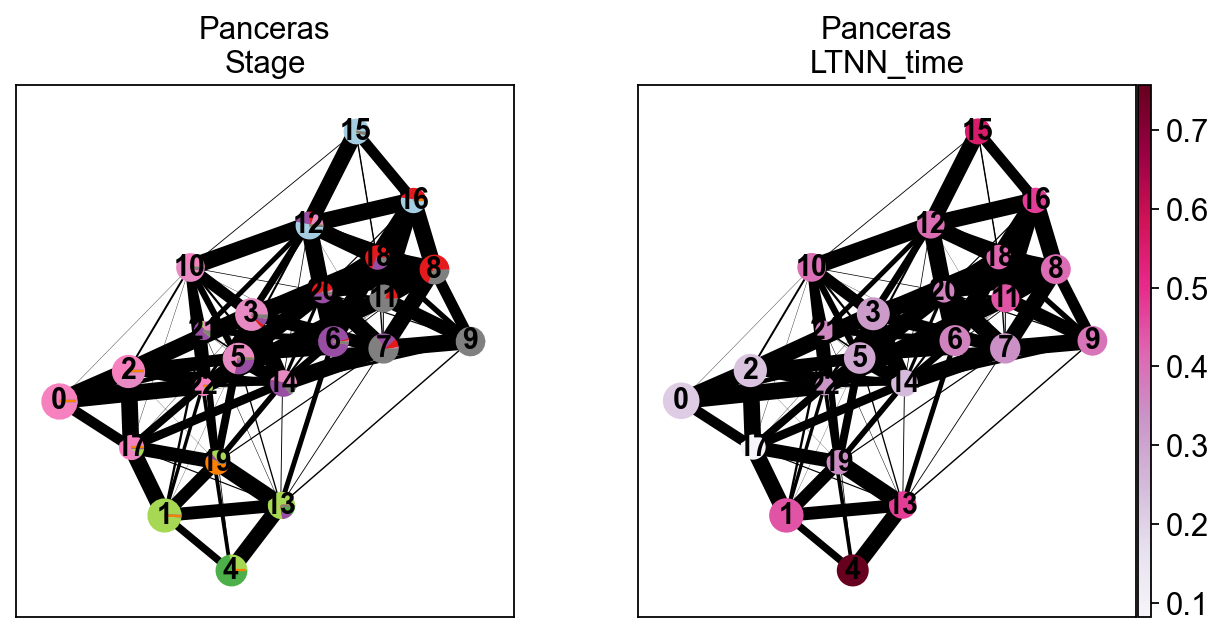

In [103]:
sc.pl.paga(ltnn_obj.adata, color=['clusters','LTNN_time'],cmap='PuRd',
          title=['Panceras\nStage','Panceras\nLTNN_time'],)
          #save='_fig3_pancreas.png')

In [104]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [105]:
scv.tl.paga(ltnn_obj.adata, groups='clusters',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


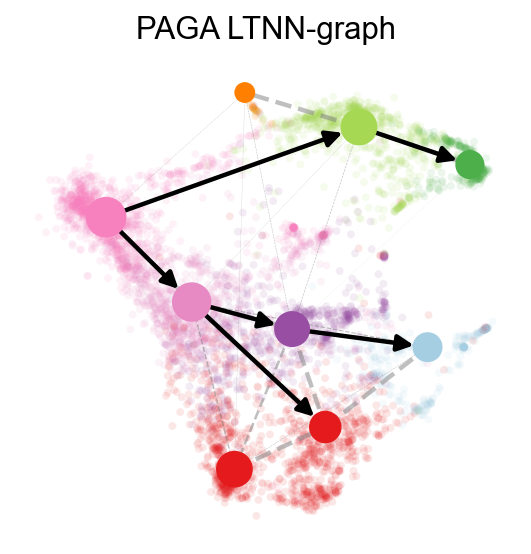

In [106]:
#fig, ax = plt.subplots(figsize=(3,3))
ax=scv.pl.paga(ltnn_obj.adata, basis='mde', size=50, alpha=.1,title='PAGA LTNN-graph',
            min_edge_width=2, node_size_scale=1.5,show=False,legend_loc=False)
plt.savefig("figures/fig3/human_paga_graph.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_paga_graph.pdf",dpi=300,bbox_inches = 'tight')

In [109]:
ltnn_obj.adata.obs['clusters'].cat.categories

Index(['HSC_1', 'HSC_2', 'Ery_1', 'Mono_1', 'Precursors', 'Mono_2', 'DCs',
       'Ery_2', 'Mega'],
      dtype='object')

In [118]:
color_dict=dict(zip(['HSC_1', 'HSC_2', 'Ery_1', 'Mono_1', 'Precursors', 'Mono_2', 'DCs',
       'Ery_2', 'Mega'],['#f781bf', '#e78ac3', '#a6d854', '#e41a1c', '#984ea3', '#e41a1c',
       '#a6cee3', '#4daf4a', '#ff7f00']))
color_dict

{'HSC_1': '#f781bf',
 'HSC_2': '#e78ac3',
 'Ery_1': '#a6d854',
 'Mono_1': '#e41a1c',
 'Precursors': '#984ea3',
 'Mono_2': '#e41a1c',
 'DCs': '#a6cee3',
 'Ery_2': '#4daf4a',
 'Mega': '#ff7f00'}

In [121]:
ltnn_obj.adata.uns['clusters_colors']=[color_dict[i] for i in ['HSC_1', 'HSC_2','Precursors', 'Mono_1','Mono_2','Mega', 'DCs','Ery_1', 'Ery_2']]

In [115]:
ltnn_obj.adata.obs['clusters']=ltnn_obj.adata.obs['clusters'].cat.reorder_categories(['HSC_1', 'HSC_2',
                                                       'Precursors', 'Mono_1','Mono_2',
                                                       'Mega', 'DCs','Ery_1', 'Ery_2'])

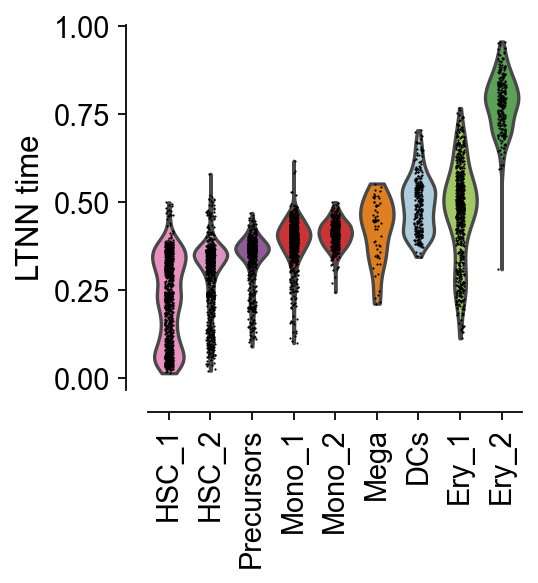

In [122]:
fig, ax = plt.subplots(figsize=(3,3))
fontsize=13
sc.pl.violin(ltnn_obj.adata, keys=["LTNN_time"], ax=ax,
             groupby="clusters", rotation=90,show=False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#ax.set_xlabel('Latent time',fontsize=fontsize)
ax.set_ylabel('LTNN time',fontsize=fontsize+1)
plt.savefig("figures/fig3/human_violin.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_violin.pdf",dpi=300,bbox_inches = 'tight')


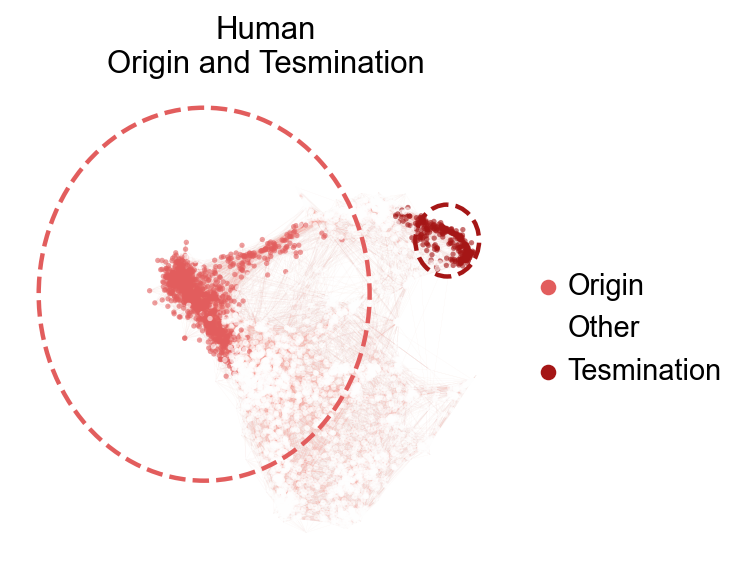

In [133]:
fig,ax=scltnn.models.plot_origin_tesmination(ltnn_obj.adata, basis='X_mde',origin=['2', '0', '17'],
                               tesmination=['4'],
                        edges=True,edges_color='#f4897b',edges_width=0.01,
                       title='Human\nOrigin and Tesmination',alpha=0.6,
                       frameon=False,legend_fontsize=13,figsize=(4,4))
plt.savefig("figures/fig3/human_ot.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_ot.pdf",dpi=300,bbox_inches = 'tight')

In [126]:
ltnn_obj.adata

AnnData object with n_obs × n_vars = 5274 × 3000
    obs: 'clusters', 'palantir_pseudotime', 'palantir_diff_potential', 'nUMIs', 'mito_perc', 'detected_genes', 'cell_complexity', 'doublet_score', 'predicted_doublet', 'passing_mt', 'passing_nUMIs', 'passing_ngenes', 'n_genes', 'leiden', 'p_time', 'p_time_r', 'p_latent_time', 'dpt_pseudotime', 'dpt_pseudotime_p', 'p_ANN_time', 'LTNN_time', 'LTNN_time_r', 'mao', 'mao_name'
    var: 'palantir', 'mt', 'n_cells', 'percent_cells', 'robust', 'mean', 'var', 'residual_variances', 'highly_variable_rank', 'highly_variable_features'
    uns: 'clusters_colors', 'palantir_branch_probs_cell_types', 'scrublet', 'log1p', 'hvg', 'scaled|original|pca_var_ratios', 'scaled|original|cum_sum_eigenvalues', 'neighbors', 'leiden', 'paga', 'leiden_sizes', 'iroot', 'diffmap_evals', 'paga_graph', 'clusters_sizes', 'mao_name_colors', 'leiden_colors'
    obsm: 'MAGIC_imputed_data', 'X_tsne', 'palantir_branch_probs', 'scaled|original|X_pca', 'X_mde', 'X_lsi', 'X_diffm

mao_name_colors


<AxesSubplot: title={'center': 'mao_name'}, xlabel='X_mde1', ylabel='X_mde2'>

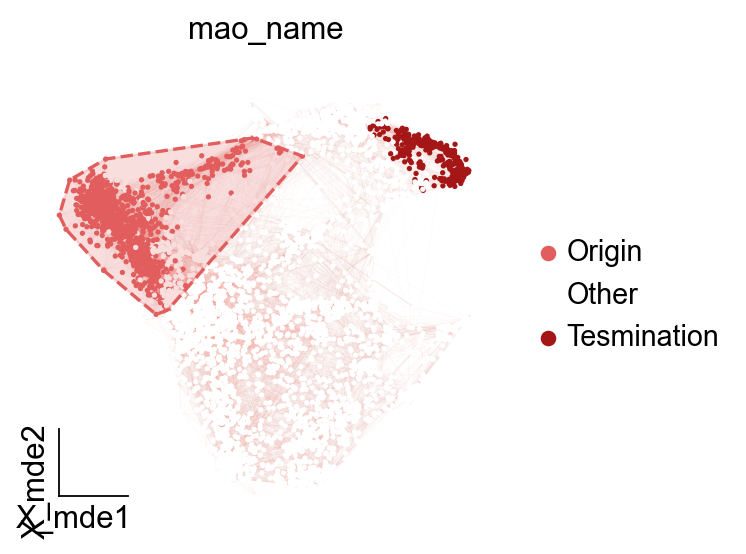

In [132]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots( figsize = (4,4))

ov.utils.embedding(ltnn_obj.adata,
                basis='X_mde',
                color=['mao_name'],
                frameon='small',
                   edges=True,edges_color='#f4897b',edges_width=0.01,
                show=False,
                ax=ax)
ov.utils.plot_ConvexHull(ltnn_obj.adata,
                basis='X_mde',
                cluster_key='mao_name',
                hull_cluster='Origin',
                ax=ax)


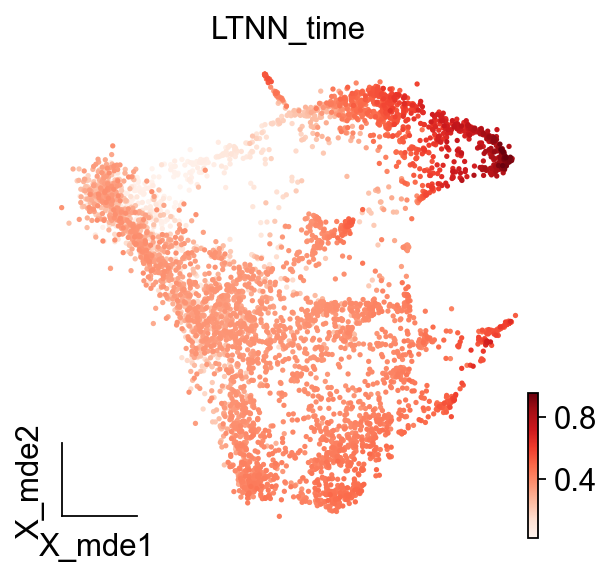

In [134]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(ltnn_obj.adata,basis='X_mde', color=['LTNN_time'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)
plt.savefig("figures/fig3/human_umap_ltnn.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_umap_ltnn.pdf",dpi=300,bbox_inches = 'tight')


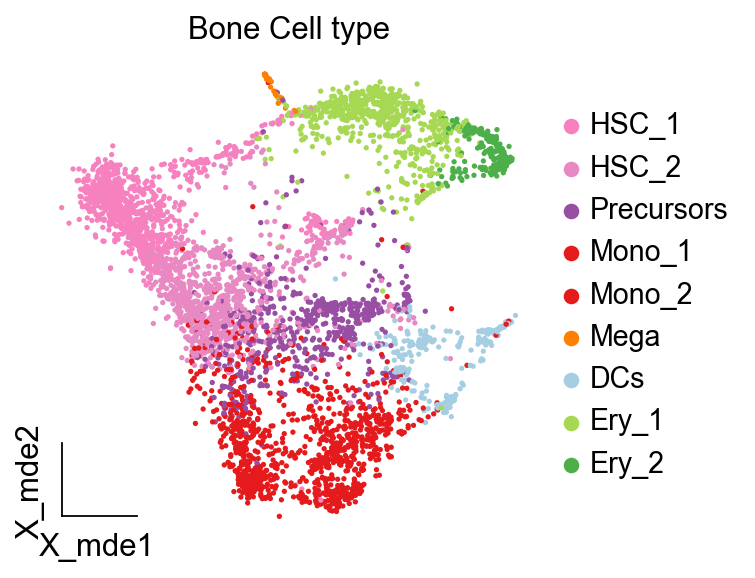

In [141]:
fig, ax = plt.subplots(figsize=(4,4))
ov.utils.embedding(ltnn_obj.adata,basis='X_mde', color=['clusters'], 
               cmap='Reds',legend_loc='right margin',frameon='small',
                   ncols=2,wspace=0.4,show=False,ax=ax)
plt.title('Bone Cell type',fontsize=14)
plt.savefig("figures/fig3/human_umap_celltype.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_umap_celltype.pdf",dpi=300,bbox_inches = 'tight')


In [136]:
import scvelo as scv
ltnn_obj.adata.uns['paga_graph']=ltnn_obj.adata.obsp['connectivities']

In [137]:
scv.tl.paga(ltnn_obj.adata, groups='leiden',vkey='paga',use_time_prior='LTNN_time')

running PAGA using priors: ['LTNN_time']
    finished (0:00:00) --> added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns)
    'paga/transitions_confidence', velocity transitions (adata.uns)


--> added 'pos', the PAGA positions (adata.uns['paga'])


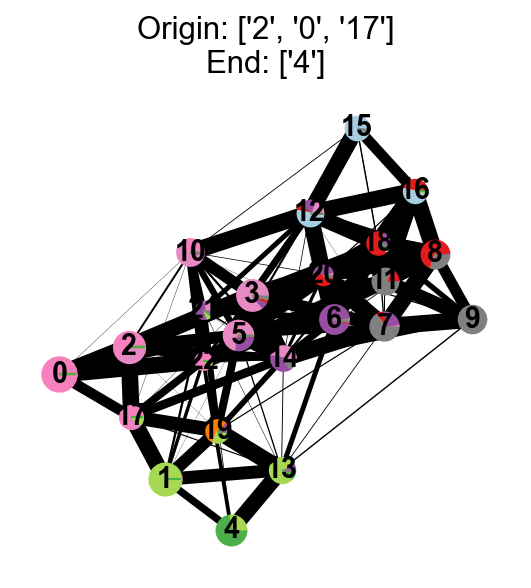

In [150]:
fig, ax = plt.subplots(figsize=(4,4))
origin=['2', '0', '17']
tesmination=['4']
sc.pl.paga(ltnn_obj.adata, color=['clusters'],cmap='PuRd',
          title=[f'Origin: {origin}\nEnd: {tesmination}'],show=False,ax=ax,frameon=False,)
plt.savefig("figures/fig3/human_paga_leiden.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_paga_leiden.pdf",dpi=300,bbox_inches = 'tight')


--> added 'pos', the PAGA positions (adata.uns['paga'])


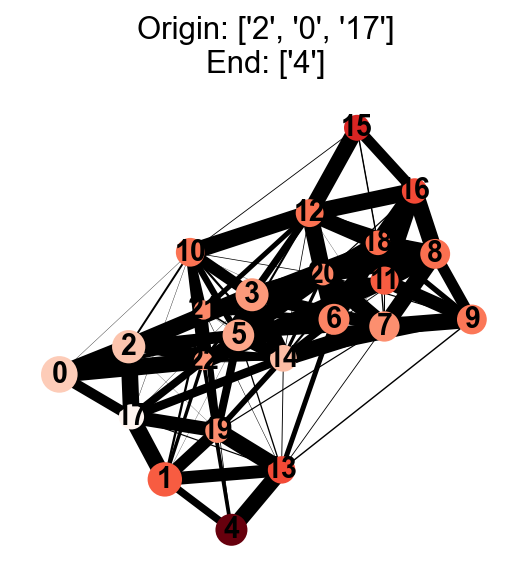

In [149]:
fig, ax = plt.subplots(figsize=(4,4))
sc.pl.paga(ltnn_obj.adata, color=['LTNN_time'],cmap='Reds',colorbar=False,
          title=[f'Origin: {origin}\nEnd: {tesmination}'],show=False,ax=ax,frameon=False,)
plt.savefig("figures/fig3/human_paga_time.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_paga_time.pdf",dpi=300,bbox_inches = 'tight')


In [159]:
from cellrank.tl.kernels import PseudotimeKernel
import scvelo as scv
ptk=PseudotimeKernel(ltnn_obj.adata,time_key='dpt_pseudotime')
ptk

<PseudotimeKernel>

In [160]:
ptk.compute_transition_matrix()
ptk.compute_projection(basis="mde")

Computing transition matrix based on `dpt_pseudotime`


  0%|          | 0/5274 [00:00<?, ?cell/s]

    Finish (0:00:01)
Projecting transition matrix onto `mde`
Adding `adata.obsm['T_fwd_mde']`
    Finish (0:00:01)


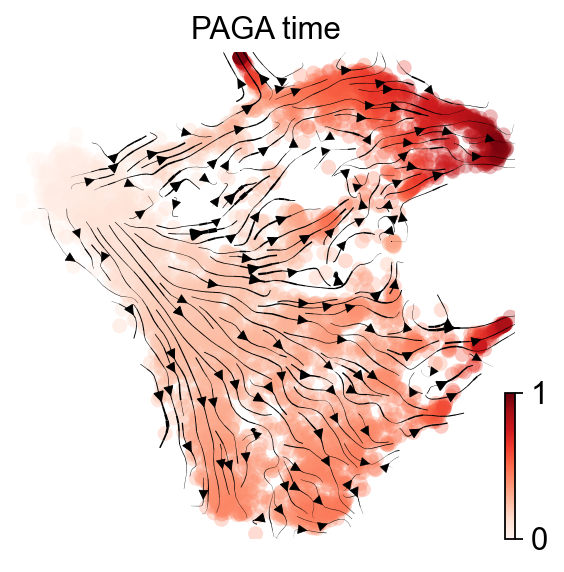

In [161]:
ax=scv.pl.velocity_embedding_stream(
    ltnn_obj.adata,  vkey="T_fwd", basis="mde",color='dpt_pseudotime',
    title='PAGA time',
    legend_loc='right margin',cmap='Reds',show=False
) 
ax.grid(False)
plt.savefig('figures/fig3/human_velo_paga.png',dpi=300,bbox_inches='tight')

In [162]:
from cellrank.tl.kernels import PseudotimeKernel
ptk=PseudotimeKernel(ltnn_obj.adata,time_key='LTNN_time')
ptk

<PseudotimeKernel>

In [163]:
ptk.compute_transition_matrix()
ptk.compute_projection(basis="mde")

Computing transition matrix based on `LTNN_time`


  0%|          | 0/5274 [00:00<?, ?cell/s]

    Finish (0:00:01)
Projecting transition matrix onto `mde`
Adding `adata.obsm['T_fwd_mde']`
    Finish (0:00:01)


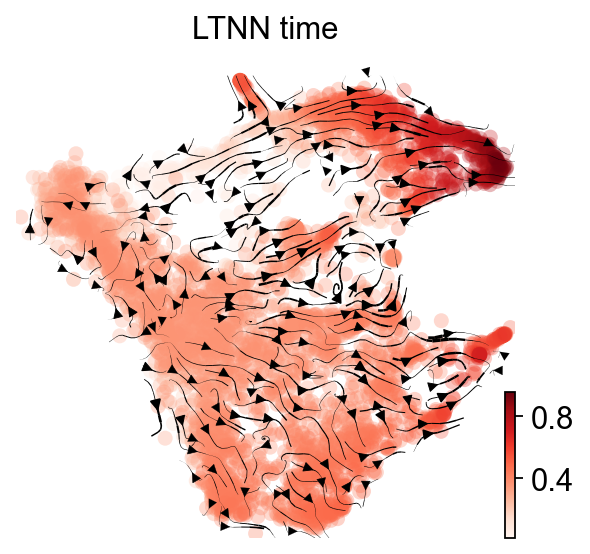

In [164]:
ax=scv.pl.velocity_embedding_stream(
    ltnn_obj.adata,  vkey="T_fwd", basis="mde",color='LTNN_time',
    title='LTNN time',
    legend_loc='right margin',cmap='Reds',show=False
) 
ax.grid(False)
plt.savefig('figures/fig3/human_velo_ltnn.png',dpi=300,bbox_inches='tight')

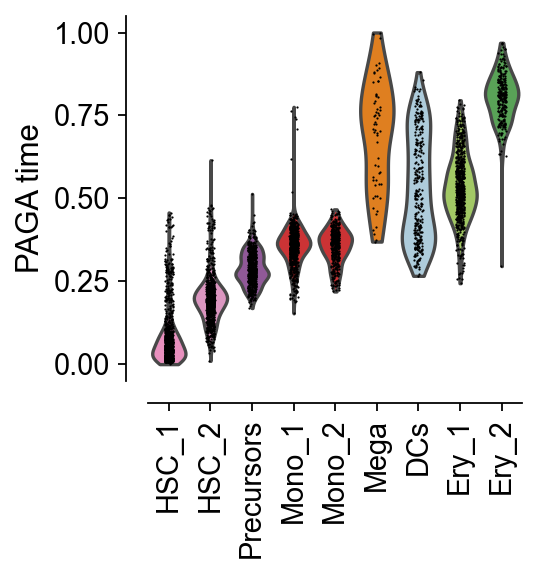

In [148]:
fig, ax = plt.subplots(figsize=(3,3))
fontsize=13
sc.pl.violin(ltnn_obj.adata, keys=["dpt_pseudotime"], ax=ax,
             groupby="clusters", rotation=90,show=False)
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))

plt.grid(False)
#设置spines可视化情况
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
#ax.set_xlabel('Latent time',fontsize=fontsize)
ax.set_ylabel('PAGA time',fontsize=fontsize+1)
plt.savefig("figures/fig3/human_violin_paga.png",dpi=300,bbox_inches = 'tight')
plt.savefig("pdf/fig3/human_violin_paga.pdf",dpi=300,bbox_inches = 'tight')
